In [1]:
#Importing Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import pickle
from pathlib import Path

## EDA (Exploratory Data Analysis)

In [2]:
# Read the data as pandas data frame
customer_df = pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/customer_segments.txt", sep="\t")

# Returns shape of the data (Row x Column)
print(customer_df.shape)

# Returns the first 5 number of rows
print(customer_df.head())

# Returns information of the data
print(customer_df.info())


(50, 7)
  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  
0       Sector              9497927  
1      Cluster              2722700  
2      Cluster              5286429  
3      Cluster              5204498  
4      Cluster             10615206  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-

Dataframe terdiri dari 50 baris dan 7 kolom (2 numeric & 5 string), tanpa Null pada data. 

## Data Visualization

C:\Anaconda\envs\py36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Anaconda\envs\py36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


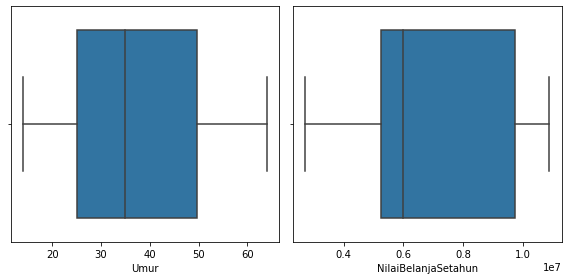

In [3]:
# Detecting Outliers of each Numerical Variable
x,y = customer_df['Umur'], customer_df['NilaiBelanjaSetahun']

fig,(ax1,ax2) =plt.subplots(1,2, figsize=(8,4))

sns.boxplot(x, ax=ax1)
sns.boxplot(y, ax=ax2)
plt.tight_layout()
plt.show()

C:\Anaconda\envs\py36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\envs\py36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


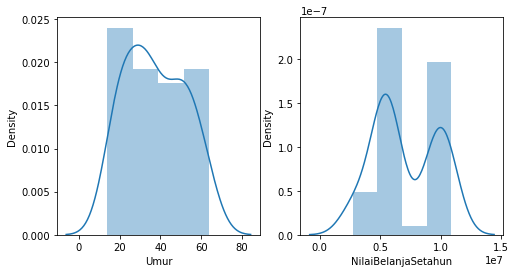

In [4]:
# Detecting Data Distribution of Each Numerical Varable

x,y = customer_df['Umur'],customer_df['NilaiBelanjaSetahun']

fig,(ax1,ax2) =plt.subplots(1,2, figsize=(8,4))

sns.distplot(x, ax=ax1)
sns.distplot(y, ax=ax2)

plt.show()

## Data Pre-Processing
Melakukan pemrosesan awal data dengan merubah kolom text menjadi numerik dan melakukan standardisasi kolom numerik.

In [6]:
from sklearn.preprocessing import StandardScaler

kolom_numerik = ['Umur','NilaiBelanjaSetahun']

print('Statik Sebelum Standarisasi\n')
print(customer_df[kolom_numerik].describe().round(1))

Statik Sebelum Standarisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   37.5            7069874.8
std    14.7            2590619.0
min    14.0            2722700.0
25%    25.0            5257529.8
50%    35.0            5980077.0
75%    49.8            9739615.0
max    64.0           10884508.0


In [7]:
#Standarisation
df_std = StandardScaler().fit_transform(customer_df[kolom_numerik])

#Creat Dataframe 
df_std= pd.DataFrame(data=df_std, index=customer_df.index, columns=customer_df[kolom_numerik].columns)


print('Contoh hasil standardisasi\n')
print(df_std.head())

Contoh hasil standardisasi

       Umur  NilaiBelanjaSetahun
0  1.411245             0.946763
1 -1.617768            -1.695081
2  0.722833            -0.695414
3  1.067039            -0.727361
4  0.240944             1.382421


In [8]:
print('Statistik hasil standardisasi\n')
print(df_std.describe().round(0))

Statistik hasil standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean    0.0                 -0.0
std     1.0                  1.0
min    -2.0                 -2.0
25%    -1.0                 -1.0
50%    -0.0                 -0.0
75%     1.0                  1.0
max     2.0                  1.0


Berdasarkan output diatas dapat dilihat bahwa mean dan standard deviasi tiap variabel memiliki nilai 0 dan 1, hal ini menunjukkan bahwa data sudah dalam skala yang sama.

Langkah selanjutnya adalah mengubah setiap kolom kategorikal pada dataframe menjadi numerik dengan menggunakan fungsi LabelEncoder(). Pada dasarnya fungsi ini akan melakukan konversi data pelanggan dari teks menjadi numerik, seperti kode dibawah ini :

In [9]:
# Categorical Data Conversion with Label Encoder
from sklearn.preprocessing import LabelEncoder

kolom_kategorikal=['Jenis Kelamin','Profesi','Tipe Residen']

df_encode = customer_df[kolom_kategorikal].copy() #duplicate data frame

for col in kolom_kategorikal :
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])
print(df_encode.head())

   Jenis Kelamin  Profesi  Tipe Residen
0              0        4             1
1              1        2             0
2              0        3             0
3              0        3             0
4              1        4             0


Nilai pada tiap kolom merepresentasikan:
- Jenis Kelamin :
0 = pria, 
1 = Wanita

- Profesi :
0 = Ibu Rumah Tangga, 
1 = Mahasiswa, 
2 = Pelajar, 
3 = Professional, 
4 = Wiraswasta 

- Tipe Residen :
0 = Cluster,
1 = Sector

In [10]:
# Merge df_std dan df_encoder menjadi df_model
df_model = df_encode.merge(df_std, left_index=True, right_index=True, how='left')
print(df_model.head())

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             1  1.411245             0.946763
1              1        2             0 -1.617768            -1.695081
2              0        3             0  0.722833            -0.695414
3              0        3             0  1.067039            -0.727361
4              1        4             0  0.240944             1.382421


## Pemodelan
Buat dan optimalkan model menggunakan algoritma k-prototype.

#### Finding the Optimal Number of Clusters

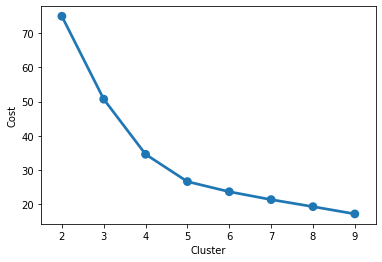

In [11]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

#Get the cost value
cost = {}
for k in range (2,10) :
    kproto = KPrototypes (n_clusters = k, random_state=75 )
    kproto.fit(df_model, categorical=[0,1,2])
    cost [k]= kproto.cost_
    
#Visualization Elbow Plot
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))
plt.xlabel('Cluster')
plt.ylabel('Cost')
plt.show()


Dari output diatas, terlihat bahwa titik siku dari plot tersebut adalah pada saat cluster = 5, sehingga kita mengguakan 5 sebagai jumlah cluster optimal.

#### Creating a Model
Buatlah model dengan jumlah kluster optimal dan simpan hasilnya sebagai pickle file.

In [12]:
import pickle

kproto = KPrototypes (n_clusters = 5, random_state=75)
kproto.fit(df_model,categorical=[0,1,2])

pickle.dump(kproto,open('cluster.pkl','wb'))

#### Using a Model That Has Been Created

In [13]:
#Customers Segmentation
clusters = kproto.predict(df_model, categorical=[0,1,2])
print('segmen pelanggan: {}\n'.format(clusters)) 

segmen pelanggan: [1 2 4 4 0 3 1 4 3 3 4 4 1 1 0 3 3 4 0 2 0 4 3 0 0 4 0 3 4 4 2 1 2 0 3 0 3
 1 3 2 3 0 3 0 3 0 4 1 3 1]



In [14]:
#Adding Cluster Column
df_final= customer_df.copy()
df_final['cluster'] = clusters
print(df_final.head())

  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  cluster  
0       Sector              9497927        1  
1      Cluster              2722700        2  
2      Cluster              5286429        4  
3      Cluster              5204498        4  
4      Cluster             10615206        0  


In [15]:
#Customer Grouping Based on Clusters Number
for i in range (0,5) :
    print ('\n Pelanggan cluster : {}\n'.format(i))

    print(df_final[df_final['cluster']==i])


 Pelanggan cluster : 0

   Customer_ID       Nama Pelanggan Jenis Kelamin  Umur     Profesi  \
4     CUST-005  Ibu Sri Wahyuni, IR        Wanita    41  Wiraswasta   
14    CUST-015     Shirley Ratuwati        Wanita    20  Wiraswasta   
18    CUST-019         Mega Pranoto        Wanita    32  Wiraswasta   
20    CUST-021     Lestari Fabianto        Wanita    38  Wiraswasta   
23    CUST-024        Putri Ginting        Wanita    39  Wiraswasta   
24    CUST-025       Julia Setiawan        Wanita    29  Wiraswasta   
26    CUST-027        Grace Mulyati        Wanita    35  Wiraswasta   
33    CUST-034       Deasy Arisandi        Wanita    21  Wiraswasta   
35    CUST-036       Ni Made Suasti        Wanita    30  Wiraswasta   
41    CUST-042         Yuliana Wati        Wanita    26  Wiraswasta   
43    CUST-044                 Anna        Wanita    18  Wiraswasta   
45    CUST-046         Elfira Surya        Wanita    25  Wiraswasta   

   Tipe Residen  NilaiBelanjaSetahun  cluster  
4  

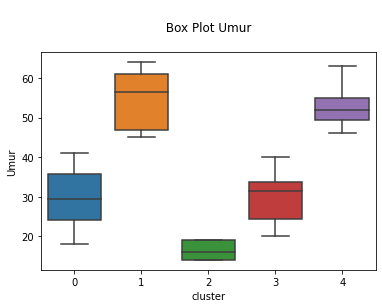

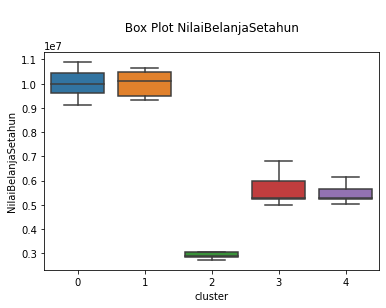

In [16]:
# Detecting Outliers from Clustering Result
for i in kolom_numerik :
    plt.figure(figsize=(6,4))
    ax = sns.boxplot (x='cluster', y= i, data=df_final)
    plt.title ('\n Box Plot {} \n'.format(i), fontsize=12)
    plt.show()

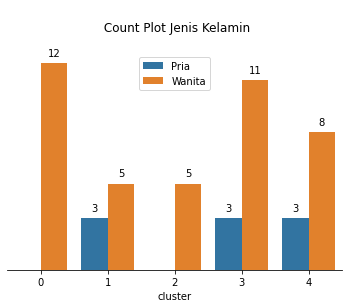

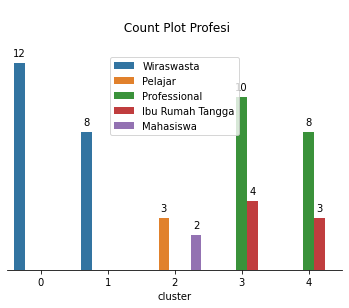

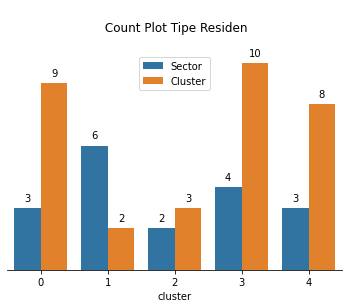

In [17]:
# Visualization of Clustering Results
for i in kolom_kategorikal :
    plt.figure(figsize=(6,4))
    ax = sns.countplot(x='cluster', data=df_final, hue=i)
    plt.title('\n Count Plot {}\n'.format(i), fontsize=12)
    ax.legend(loc="upper center") #Legend
    for p in ax.patches : 
        ax.annotate(format(p.get_height(), '.0f'),  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha = 'center',  
        va = 'center',  
        xytext = (0, 10),  
        textcoords = 'offset points')  
        sns.despine(right=True,top = True, left = True)  
        ax.axes.yaxis.set_visible(False)
    plt.show()  
        

In [18]:
# Adding Segmen Column & Mapping segment
df_final['segmen'] = df_final['cluster'].map({
    0: 'Diamond Young Member',  
    1: 'Diamond Senior Member',  
    2: 'Silver Member',  
    3: 'Gold Young Member',  
    4: 'Gold Senior Member' 
})
print(df_final.head())

  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  cluster                 segmen  
0       Sector              9497927        1  Diamond Senior Member  
1      Cluster              2722700        2          Silver Member  
2      Cluster              5286429        4     Gold Senior Member  
3      Cluster              5204498        4     Gold Senior Member  
4      Cluster             10615206        0   Diamond Young Member  


Dari hasil observasi pemodelan diatas, berikut ini kesimpulan segmentasi pelanggan dari tiap nomor kluster :
- Cluster 0: Diamond Young Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Selain itu isi dari cluster ini memiliki umur sekitar 18 - 41 tahun dengan rata-ratanya adalah 29 tahun.
- Cluster 1: Diamond Senior Entrepreneur, isi cluster ini adalah para wiraswata yang memiliki nilai transaksi rata-rata mendekati 10 juta. Isi dari cluster ini memiliki umur sekitar 45 - 64 tahun dengan rata-ratanya adalah 55 tahun.
- Cluster 2: Silver Students, isi cluster ini adalah para pelajar dan mahasiswa dengan rata-rata umur mereka adalah 16 tahun dan nilai belanja setahun mendekati 3 juta.
- Cluster 3: Gold Young Member, isi cluster ini adalah para professional dan ibu rumah tangga yang berusia muda dengan rentang umur sekitar 20 - 40 tahun dan dengan rata-rata 30 tahun dan nilai belanja setahun nya mendekati 6 juta.
- Cluster 4: Gold Senior Member, isi cluster ini adalah para professional dan ibu rumah tangga yang berusia tua dengan rentang umur 46 - 63 tahun dan dengan rata-rata 53 tahun dan nilai belanja setahun nya mendekati 6 juta.

## Pengoperasian Model
Gunakan model untuk memprediksi data - data baru

In [19]:
#New Data
data = [{
    'Customer_ID': 'CUST-100' ,  
    'Nama Pelanggan': 'Rahmad' ,  
    'Jenis Kelamin': 'Pria',  
    'Umur': 45,  
    'Profesi': 'Professional',  
    'Tipe Residen': 'Cluster' ,  
    'NilaiBelanjaSetahun': 8230000  
}]

#New Data Frame
new_data = pd.DataFrame(data)
print(new_data)

  Customer_ID Nama Pelanggan Jenis Kelamin  Umur       Profesi Tipe Residen  \
0    CUST-100         Rahmad          Pria    45  Professional      Cluster   

   NilaiBelanjaSetahun  
0              8230000  


#### Data Pre-Processing
Buatlah fungsi untuk melakukan pemrosesan data berdasarkan parameter yang sama dengan sebelumnya. Fungsi tersebut dapat digunakan untuk melakukan konversi data kategorikal menjadi numerik &  melakukan standardisasi kolom numerikal
Untuk melakukan standardisasi dengan variable yang sama pada saat permodelan kita perlu menggunakan nilai rata-rata dan standard deviasi dari tiap variabel.
- Umur : Mean = 37.5 & Std = 14.7
- NilaiBelanjaSetahun : Mean = 7069874.8 & Std = 2590619.0

In [32]:
# Data Pre-Processing Function
def data_preprocess(data):  
    # Konversi Kategorikal data  
    kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']  
      
    df_encode = data[kolom_kategorikal].copy()  
  
    ## Jenis Kelamin   
    df_encode['Jenis Kelamin'] = df_encode['Jenis Kelamin'].map({  
        'Pria': 0,  
        'Wanita' : 1  
    })  
      
    ## Profesi  
    df_encode['Profesi'] = df_encode['Profesi'].map({  
        'Ibu Rumah Tangga': 0,  
        'Mahasiswa' : 1,  
        'Pelajar': 2,  
        'Professional': 3,  
        'Wiraswasta': 4  
    })  
      
    ## Tipe Residen  
    df_encode['Tipe Residen'] = df_encode['Tipe Residen'].map({  
        'Cluster': 0,  
        'Sector' : 1  
    })  
    # Standardisasi Numerical Data  
    kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
    df_std = data[kolom_numerik].copy()  
      
    ## Standardisasi Kolom Umur  
    df_std['Umur'] = (df_std['Umur'] - 37.5)/14.7  
      
    ## Standardisasi Kolom Nilai Belanja Setahun  
    df_std['NilaiBelanjaSetahun'] = (df_std['NilaiBelanjaSetahun'] - 7069874.8)/2590619.0  
      
    # Menggabungkan Kategorikal dan numerikal data  
    df_model = df_encode.merge(df_std, left_index = True,  
                           right_index=True, how = 'left')  
      
    return df_model  
  

In [34]:
 # Menjalankan fungsi  
new_df_model = data_preprocess(new_data)  
  
print(new_df_model) 

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        3             0  0.510204             0.447818


#### Pemodelan
Buatlah fungsi yang bisa di gunakan untuk memanggil model dan melakukan prediksi serta menyimpan hasilnya nya kedalam satu dataframe.

In [41]:
def modelling (data):  
      
    # Memanggil Model  
    kpoto = pickle.load(open('cluster.pkl', 'rb'))  
      
    # Melakukan Prediksi  
    clusters= kpoto.predict(data,categorical=[0,1,2])  
      
    return clusters  
  
# Menjalankan Fungsi  
clusters = modelling(new_df_model)  
  
print(clusters)  


[4]


Buat fungsi yang bernama menamakan_segmen dengan data asli dan clusters sebagai inputnya. 

In [43]:
def menamakan_segmen (data_asli, clusters):  
      
    # Menggabungkan cluster dan data asli  
    final_data = data_asli.copy()  
    final_data['cluster'] = clusters
      
    # Menamakan segmen  
    final_data['segmen'] = final_data['cluster'].map({  
        0: 'Diamond Young Member',  
        1: 'Diamond Senior Member',  
        2: 'Silver Students',  
        3: 'Gold Young Member',  
        4: 'Gold Senior Member'  
    })  
      
    return final_data
  
# Menjalankan Fungsi  
new_final_df = menamakan_segmen(new_data,clusters)  
  
print(new_final_df)  


  Customer_ID Nama Pelanggan Jenis Kelamin  Umur       Profesi Tipe Residen  \
0    CUST-100         Rahmad          Pria    45  Professional      Cluster   

   NilaiBelanjaSetahun  cluster              segmen  
0              8230000        4  Gold Senior Member  
